# Gaussian Smoothing

Complete the functions below, and run the cell.

1. `gaussian_kernel()`
2. `convolve()`

The cell first asks the user to upload an image to be smoothed (if the form `upload_image` is on), compute the gaussian kernel, and apply it to the image. The radius and the variance of the kernel are specified by the variables `kernel_radius` and `sigma` via the form in the cell.

----

*hint*: An isotropic 2D Gaussian kernel is given by
\begin{equation}
h(x, y) = \frac{1}{2\pi\sigma^2} \exp\left( -\frac{x^2+y^2}{2\sigma^2}\right),
\end{equation}
where $\sigma$ is the variance, and the Gaussian smoothing is defined as
\begin{equation}
g(x) = f(x) * h(x),
\end{equation}
where $f(x)$ is the uploaded image.


In [0]:
#@title Gaussian Smoothing
upload_image = True #@param {type:"boolean"}
kernel_radius = 3 #@param {type:"integer"}
sigma = 2 #@param {type:"number"}

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from numpy import median,sort,fromfunction
from numpy import array as ar

#Assistant function for constructing 2d-array
rangFun=lambda x:fromfunction(lambda i,j:ar(list(zip(ar(i).flatten(),ar(j).flatten()))).reshape(x[0]*x[1],2).astype('int32'),(x))

In [0]:
#Return a 2D Gaussian kernel of size (kernel_radius*2+1, kernel_radius*2+1)
def gaussian_kernel(sigma, kernel_radius):
    return np.array([[(1/(2*np.pi*sigma**2))*np.exp(-((i-kernel_radius)**2+(j-kernel_radius)**2)/(2.0*sigma**2)) for j in range(2*kernel_radius+1)] for i in range(2*kernel_radius+1)])

In [0]:
#Return f*g as a 2D array of dtype=np.uint8
loc=lambda x,radius,i,boundary:x if (x-radius+i<0 or x-radius+i>boundary-1) else x-radius+i
con=lambda f,g,x,y,radius: np.sum(np.array([[g[i][j]*f[loc(x,radius,i,f.shape[0])][loc(y,radius,j,f.shape[1])] for j in range(g.shape[1])] for i in range(g.shape[0])]))
def convolve(f, g):
    return np.array([[con(f,g,i,j,int(g.shape[0]/2)) for j in range(f.shape[1])] for i in range(f.shape[0])])

In [0]:
def add_salt_and_pepper(img, prob):
    '''Adds "Salt & Pepper" noise to an image.
    img: should be one-channel image with pixels in [0, 255] range
    prob: probability (threshold) that controls level of noise'''
    rnd = np.random.rand(img.shape[0], img.shape[1])
    noisy = img.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 255
    return noisy


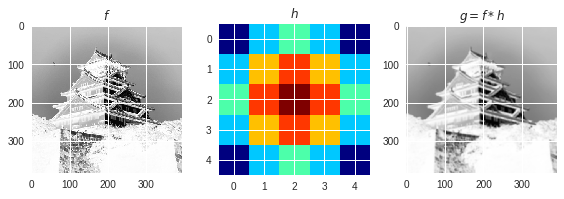

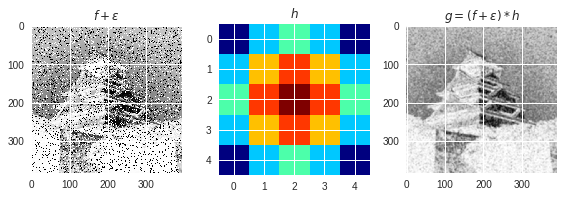

In [12]:
f = cv2.imread('osakaSmall.png', cv2.IMREAD_GRAYSCALE)
h = gaussian_kernel(kernel_radius, sigma)
g = convolve(f, h)

fig, axes = plt.subplots(1, 3)
axes[0].imshow(f)
axes[0].set_title(r'$f$')
axes[1].imshow(h, cmap='jet')
axes[1].set_title(r'$h$')
axes[2].imshow(g)
axes[2].set_title(r'$g=f*h$')
fig.tight_layout()
plt.show(fig)

# Add 10% noise
f2 = add_salt_and_pepper(f, 0.1)
g2 = convolve(f2, h)
fig, axes = plt.subplots(1, 3)
axes[0].imshow(f2)
axes[0].set_title(r'$f + \epsilon$')
axes[1].imshow(h, cmap='jet')
axes[1].set_title(r'$h$')
axes[2].imshow(g2)
axes[2].set_title(r'$g=(f+\epsilon)*h$')
fig.tight_layout()
plt.show(fig)


# Median Filtering

Complete the functions below, and run the cell.

* `median_filtering()`

The cell first asks the user to upload an image (if the form `upload_image` is on), and then apply the median filter. The radius of the filter is specified by the variable `kernel_radius` via the form in the cell.


In [0]:
#@title Median Filtering
upload_image = True #@param {type:"boolean"}
kernel_radius = 2 #@param {type:"integer"}

In [0]:
def mid(f,x,y,radius):
    [xmin,xmax,ymin,ymax]=[max(0,x-radius),min(x+radius,f.shape[0]),max(0,y-radius),min(y+radius,f.shape[1])]
    return median(sort(np.array([f[i][j] for j in range(ymin,ymax) for i in range(xmin,xmax)])))

def median_filtering(f, kernel_radius):
#Apply the result of median filtering to f. The size of the window is (kernel_radius*2+1, kernel_radius*2+1).
    return np.array([mid(f,t[0],t[1],kernel_radius) for t in rangFun(f.shape)]).reshape(f.shape)

In [0]:
def add_salt_and_pepper(img, prob):
    '''Adds "Salt & Pepper" noise to an image.
    img: should be one-channel image with pixels in [0, 255] range
    prob: probability (threshold) that controls level of noise'''
    rnd = np.random.rand(img.shape[0], img.shape[1])
    noisy = img.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 255
    return noisy

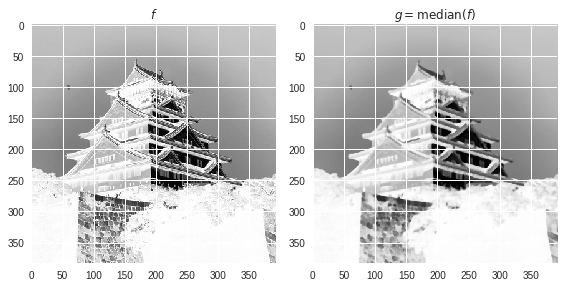

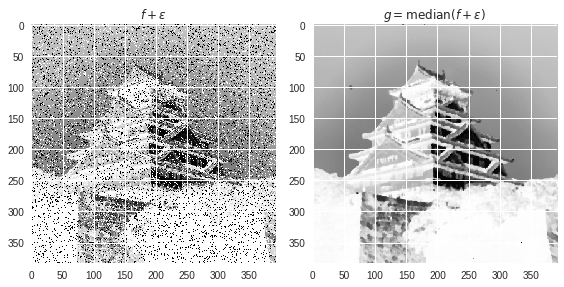

In [16]:
f = cv2.imread('osakaSmall.png', cv2.IMREAD_GRAYSCALE)
g = median_filtering(f, kernel_radius)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(f)
axes[0].set_title(r'$f$')
axes[1].imshow(g)
axes[1].set_title(r'$g=\mathrm{median}(f)$')
fig.tight_layout()
plt.show(fig)

# Add 10% noise
f2 = add_salt_and_pepper(f, 0.1)
g2 = median_filtering(f2, kernel_radius)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(f2)
axes[0].set_title(r'$f+\epsilon$')
axes[1].imshow(g2)
axes[1].set_title(r'$g=\mathrm{median}(f+\epsilon)$')
fig.tight_layout()
plt.show(fig)

# Sub-Sampling with Gaussian Pre-Filtering

Complete the functions below, and run the cell.

1. `subsampling()`
2. `subsampling_with_gaussian()`

The cell first asks the user to upload an image (if the form `upload_image` is on), and then outputs the sub-sampled images with and without Gaussian prefiltering. The target image size, $1/\mathrm{ratio}$ of the original, is specified by the variable `ratio` via the form in the cell. Similarly the Guassian kernel for prefiltering is specified by `kernel_radius` and `sigma`.


In [0]:
#@title Sub-Sampling with Gaussian Pre-Filtering
upload_image = True #@param {type:"boolean"}
ratio = 2 #@param {type:"integer"}
kernel_radius = 2 #@param {type:"integer"}
sigma = 1 #@param {type:"integer"}


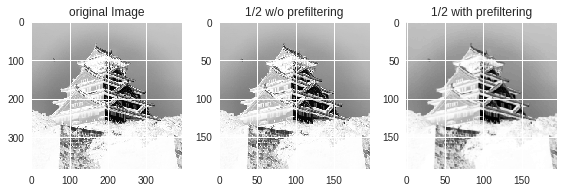

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import PIL.Image
from google.colab import files

def subsampling(f, ratio):
    """
    Subsample the image without prefiltering.
    The output image size is (W//ratio, H//ratio), where (W, H) is the size of f.
    """
    return ar([[f[i][j] for j in range(0,f.shape[1],kernel_radius)] for i in range(0,f.shape[0],kernel_radius)],dtype='uint8')


def subsampling_with_gaussian(f, ratio, kernel_radius, sigma):
    """
    Subsample the image with Gaussian prefiltering.
    The output image size is (W//ratio, H//ratio), where (W, H) is the size of f.
    kernel_radius and sigma specifies the Gaussian kernel.
    """
    h = gaussian_kernel(kernel_radius, sigma)
    g = convolve(f, h)
    return subsampling(g,ratio) 
    

def upload_sub(msg):
    print(msg)
    f = files.upload()
    if bool(f) is False:
        return None
    fname = list(f.keys())[0]
    return fname


def upload(msg):
    f = None
    while f is None:
        f = upload_sub(msg)
    return f


def show_raw(img):
    IPython.display.display(PIL.Image.fromarray(img))

f = cv2.imread('osakaSmall.png', cv2.IMREAD_GRAYSCALE)
#if upload_image is True:
#    f = cv2.imread(upload('IMAGE:'), cv2.IMREAD_GRAYSCALE)
g1 = subsampling(f, ratio)
g2 = subsampling_with_gaussian(f, ratio, kernel_radius, sigma)

fig, axes = plt.subplots(1, 3)
axes[0].imshow(f)
axes[0].set_title('original Image')

axes[1].imshow(g1)
axes[1].set_title('1/%d w/o prefiltering'%ratio)
axes[2].imshow(g2)
axes[2].set_title('1/%d with prefiltering'%ratio)
fig.tight_layout()
plt.show(fig)

# Difference of Gaussians

Complete the functions below, and run the cell.

1. `difference_of_gaussians_1()`
2. `difference_of_gaussians_2()`

The cell first asks the user to upload an image (if the form `upload_image` is on), and computes the difference of Gaussians in two different approaches.

The funstion `difference_of_gaussian_1()` computes Gaussian smoothing with two different kernels (`kernel_radius1`&`sigma1`, `kernel_radius2`&`sigma2`), and then returns their absolute difference.

The function `difference_of_gaussian_2()` computes Gaussian smoothing with a single kernel (`kernel_radius1`&`sigma1`) for two images of different sizes: the original image and its $1/\mathrm{ratio}$ subsampled one.

By choosing `kernel_radius1`, `sigma1`, `kernel_radius2`, `sigma2`, and `ratio` appropriately, the two output images become visually identical to each other.


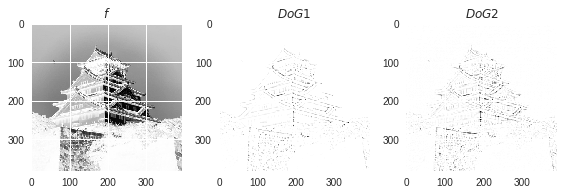

In [29]:
#@title Difference of Gaussians
upload_image = False #@param {type:"boolean"}
kernel_radius1 = 1 #@param {type:"integer"}
sigma1 = 1 #@param {type:"integer"}
kernel_radius2 = 3 #@param {type:"integer"}
sigma2 = 5 #@param {type:"integer"}
ratio = 2 #@param {type:"integer"}

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


def upsampling(f,ratio):
    return ar([[f[int(i/ratio)][int(j/ratio)] for j in range(f.shape[1]*ratio)] for i in range(f.shape[0]*ratio)],dtype='uint8')

def differenceOfPicture(g1,g2):
    return ar([[max((g1[i][j]-g2[i][j]),0)for j in range(g1.shape[1])]for i in range(g1.shape[0])],dtype='uint8')

def difference_of_gaussians_1(f, kernel_radius1, sigma1, kernel_radius2, sigma2):
    """
    Computes the difference of Gaussians
    """
    assert kernel_radius1 > 0
    assert kernel_radius2 > 0
    assert sigma1 > 0
    assert sigma2 > 0
    # g1 = f* Gaussian of kernel size=(kernel_radius1*2+1, kernel_radius1*2+1), variance=sigma1
    h1 =  gaussian_kernel(kernel_radius1, sigma1)
    g1 = convolve(f, h1)
    # g2 = f * Gaussian of kernel size=(kernel_radius2*2+1, kernel_radius2*2+1), variance=sigma2
    h2 =  gaussian_kernel(kernel_radius2, sigma2)
    g2 = convolve(f, h2)
    # return |g1 - g2| as np.uint8 array
    return differenceOfPicture(g1,g2)
    
    

def difference_of_gaussians_2(f, kernel_radius, sigma, ratio):
    """
    Computes the difference of Gaussians
    """
    assert kernel_radius1 > 0
    assert kernel_radius2 > 0
    assert sigma1 > 0
    assert sigma2 > 0
    # g1 = f * Gaussian of kernel size=(kernel_radius*2+1, kernel_radius*2+1), variance=sigma
    h1 = gaussian_kernel(kernel_radius,sigma)
    g1 = convolve(f,h1)
    # g2 = 1/ratio size image of f
    g2 = subsampling(f,ratio)
    
    # g3 = g2 * Gaussian of kernel size=(kernel_radius*2+1, kernel_radius*2+1), variance=sigma
    g3 = convolve(g2,h1)
    # g4 = upsampling of g3 to the original size of f
    g4 = upsampling(g3,ratio)
    # return |g1 - g4| as np.uint8 array
    return differenceOfPicture(g1,g4)
    
    

def upload_sub(msg):
    print(msg)
    f = files.upload()
    if bool(f) is False:
        return None
    fname = list(f.keys())[0]
    return fname


def upload(msg):
    f = None
    while f is None:
        f = upload_sub(msg)
    return f


#if upload_image is True:
#    f = cv2.imread(upload('IMAGE:'), cv2.IMREAD_GRAYSCALE)
f = cv2.imread('osakaSmall.png', cv2.IMREAD_GRAYSCALE)

g1 = difference_of_gaussians_1(f, kernel_radius1, sigma1, kernel_radius2, sigma2)
g2 = difference_of_gaussians_2(f, kernel_radius1, sigma1, ratio)

fig, axes = plt.subplots(1, 3)
axes[0].imshow(f)
axes[0].set_title(r'$f$')
axes[1].imshow(g1)
axes[1].set_title(r'$DoG1$')
axes[2].imshow(g2)
axes[2].set_title(r'$DoG2$')
fig.tight_layout()
plt.show(fig)



# deleted code 